In [1]:
import keras
import numpy as np                ### Import needed packages
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")    ### Calling the training data set and storing it

In [3]:
df.head()           ### To check what the file actually contains

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape          ### Seeing the size of the dataset

(1460, 81)

In [5]:
df.isnull().sum()    ### Shows the number of missing/null values in each column

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

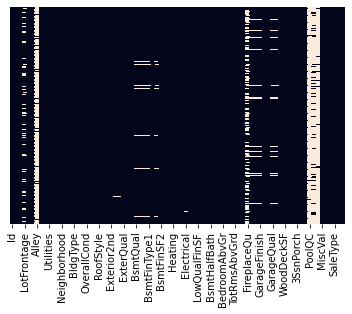

In [6]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False) ### Shows heatmap for missing values per column

In [7]:
df.info()  ### Gives info on variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())   ## Fills missing frontage vals with mean of all vals

In [9]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
df.drop(['Alley'],axis=1,inplace=True)

In [11]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [12]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [14]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
df.shape

(1460, 76)

In [17]:
df.drop(['Id'],axis=1,inplace=True)

In [18]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [19]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

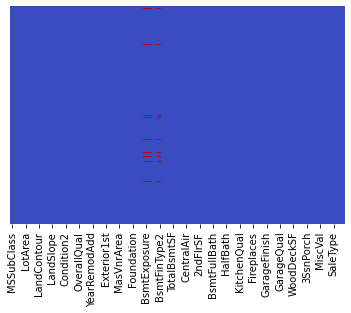

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [21]:
df.dropna(inplace=True)

<AxesSubplot:>

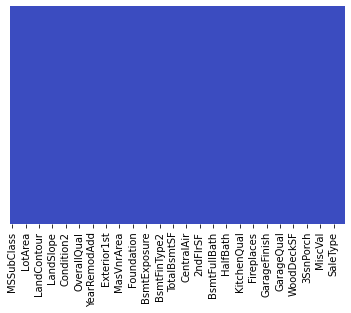

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [23]:
df.shape


(1420, 75)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1420 non-null   int64  
 1   MSZoning       1420 non-null   object 
 2   LotFrontage    1420 non-null   float64
 3   LotArea        1420 non-null   int64  
 4   Street         1420 non-null   object 
 5   LotShape       1420 non-null   object 
 6   LandContour    1420 non-null   object 
 7   Utilities      1420 non-null   object 
 8   LotConfig      1420 non-null   object 
 9   LandSlope      1420 non-null   object 
 10  Neighborhood   1420 non-null   object 
 11  Condition1     1420 non-null   object 
 12  Condition2     1420 non-null   object 
 13  BldgType       1420 non-null   object 
 14  HouseStyle     1420 non-null   object 
 15  OverallQual    1420 non-null   int64  
 16  OverallCond    1420 non-null   int64  
 17  YearBuilt      1420 non-null   int64  
 18  YearRemo

In [29]:
df2 = df[['TotalBsmtSF','GrLivArea','OverallQual','OverallCond','PoolArea','LotFrontage','LotArea','1stFlrSF','2ndFlrSF','GarageArea','SalePrice']]

In [30]:
df2.head()

,TotalBsmtSF,GrLivArea,OverallQual,OverallCond,PoolArea,LotFrontage,LotArea,1stFlrSF,2ndFlrSF,GarageArea,SalePrice
0,856,1710,7,5,0,65.0,8450,856,854,548,208500
1,1262,1262,6,8,0,80.0,9600,1262,0,460,181500
2,920,1786,7,5,0,68.0,11250,920,866,608,223500
3,756,1717,7,5,0,60.0,9550,961,756,642,140000
4,1145,2198,8,5,0,84.0,14260,1145,1053,836,250000


In [31]:
print(df2.shape)

(1420, 11)


In [39]:
import keras
import numpy as np
import pandas as pd

In [40]:
x = np.asarray(df2.drop(columns=['SalePrice']))
y = np.asarray(df2[['SalePrice']])

In [52]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation = 'relu', input_shape=(10,)))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(1))

In [53]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [54]:
model.fit(x,y,epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/30
45/45 [==============================] - 0s 1ms/step - loss: 37030813696.0000
Epoch 2/30
45/45 [==============================] - 0s 1ms/step - loss: 32289851392.0000
Epoch 3/30
45/45 [==============================] - 0s 1ms/step - loss: 24791898112.0000
Epoch 4/30
45/45 [==============================] - 0s 1ms/step - loss: 17188571136.0000
Epoch 5/30
45/45 [==============================] - 0s 1ms/step - loss: 13928877056.0000
Epoch 6/30
45/45 [==============================] - 0s 1ms/step - loss: 12926137344.0000
Epoch 7/30
45/45 [==============================] - 0s 1ms/step - loss: 12239268864.0000
Epoch 8/30
45/45 [==============================] - 0s 976us/step - loss: 11544173568.0000
Epoch 9/30
45/45 [==============================] - 0s 1ms/step - loss: 10823140352.0000
Epoch 10/30
45/45 [==============================] - 0s 974us/step - loss: 10121802752.0000
Epoch 11/30
45/45 [==============================] - 0s 1ms/step - loss: 9541404672.0000
Epoch 12/30
45/4

45/45 [==============================] - 0s 1ms/step - loss: 2690526720.0000


In [55]:
tester = np.array()
print(model.predict(tester.reshape(1,10), batch_size=1))


[[139626.95]]


In [ ]:
df[['TotalBsmtSF','GrLivArea','OverallQual','OverallCond','PoolArea','LotFrontage','LotArea','1stFlrSF','2ndFlrSF','GarageArea','SalePrice']]